## Classifying Text with Common Emotions

In [195]:
# Loading required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import neattext.functions as ntf

### Pre-processing Data

In [196]:
emotion = pd.read_csv("combined_dataset.csv")
emotion = emotion.drop(columns = 'Unnamed: 0')

emotion.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [197]:
emotion.shape

(20000, 2)

In [198]:
emotion['Emotion'].value_counts()

joy         6761
sadness     5797
anger       2709
fear        2373
love        1641
surprise     719
Name: Emotion, dtype: int64

<AxesSubplot:xlabel='Emotion', ylabel='count'>

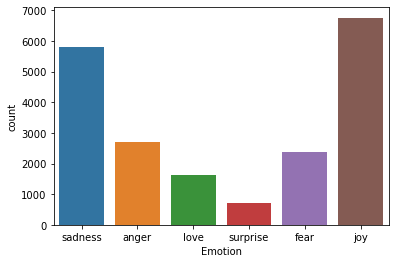

In [199]:
sns.countplot(x = 'Emotion', data = emotion)

### Data Cleaning

In [200]:
emotion['Cleaned Text'] = emotion['Text'].str.strip()
emotion['Emotion'] = emotion['Emotion'].str.strip()

emotion['Emotion'] = emotion['Emotion'].replace(
    ['joy','surprise', 'love'],'Positive')

emotion['Emotion'] = emotion['Emotion'].replace(
    ['fear','sadness','anger'],'Negative')

emotion.head()

,Text,Emotion,Cleaned Text
0,i didnt feel humiliated,Negative,i didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,Negative,i can go from feeling so hopeless to so damned...
2,im grabbing a minute to post i feel greedy wrong,Negative,im grabbing a minute to post i feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,Positive,i am ever feeling nostalgic about the fireplac...
4,i am feeling grouchy,Negative,i am feeling grouchy


In [201]:
emotion['Emotion'].value_counts()

Negative    10879
Positive     9121
Name: Emotion, dtype: int64

In [202]:
def lower_case(text):    

    text = text.lower()
    
    return text

emotion['Cleaned Text'] = emotion['Text'].apply(lower_case)

In [203]:
emotion['Cleaned Text'] = emotion['Cleaned Text'].apply(ntf.remove_special_characters)

In [204]:
from collections import Counter
from wordcloud import WordCloud, STOPWORDS

import nltk
from nltk.corpus import stopwords

import re

from nltk import word_tokenize 
from nltk.util import ngrams
from nltk.stem import WordNetLemmatizer

from wordcloud import WordCloud

def ngrams_pos(data,n):
    text = " ".join(data)
    remove_stop_words = [word for word in nltk.word_tokenize(text) if word not in stopwords_pos and len(word) > 2]
    ngram = list(nltk.ngrams(remove_stop_words, n))
    return ngram

def ngrams_neg(data,n):
    text = " ".join(data)
    remove_stop_words = [word for word in nltk.word_tokenize(text) if word not in stopwords_neg and len(word) > 2]
    ngram = list(nltk.ngrams(remove_stop_words, n))
    return ngram

def most_common(list):
    pieces = [piece for piece in list]
    words = Counter(pieces).most_common(15)
    conversion = dict(words)
    return conversion

In [205]:
bannedWord_pos = ['time', 'know', 'get', 'even', 'ive', 'going', 'today', 'things', 'could',
             'dont', 'people', 'back', 'always', 'day', 'something','think', 'one',
             'would', 'want', 'say', 'enough', 'didnt', 'http', 'never', 'makes',
             'sure', 'bit', 'way', 'everything', 'anything', 'around', 'quite',
             'felt', 'lot', 'home', 'take', 'href' ,'less', 'actually', 'able', 'ever',
             'year', 'really', 'make', 'much', 'still', 'right', 'though', 'got', 'made',
             'many', 'days', 'come', 'take', 'little', 'also', 'without', 'left', 'said',
             'god', 'need', 'someone', 'look', 'keep', 'trying', 'read', 'long', 'first',
             'last', 'every', 'look', 'cant', 'part', 'important', 'see', 'sometimes', 'making',
             'person', 'tell', 'away', 'thought', 'ill', 'let', 'try', 'week', 'getting',
             'thing', 'looking', 'others', 'remember', 'rather', 'blog', 'already', 'feel',
                 'place', 'life', 'two', 'write', 'content', 'times', 'give', 'put', 
                 'yet', 'find', 'since', 'may', 'img', 'src', 'old', 'might', 'night',
                 'world', 'done', 'help', 'started', 'starting', 'start']

stopwords_pos = stopwords.words('english')
stopwords_pos.extend(bannedWord_pos)

bannedWord_neg = ['time', 'know', 'get', 'even', 'ive', 'going', 'today', 'things', 'could',
             'dont', 'people', 'back', 'always', 'day', 'something','think', 'one',
             'would', 'want', 'say', 'enough', 'didnt', 'http', 'never', 'makes',
             'sure', 'bit', 'way', 'everything', 'anything', 'around', 'quite',
             'felt', 'lot', 'home', 'take', 'href' ,'less', 'actually', 'able', 'ever',
             'year', 'really', 'make', 'much', 'still', 'right', 'though', 'got', 'made',
             'many', 'days', 'come', 'take', 'little', 'also', 'without', 'left', 'said',
             'god', 'need', 'someone', 'look', 'keep', 'trying', 'read', 'long', 'first',
             'last', 'every', 'look', 'cant', 'part', 'important', 'see', 'sometimes', 'making',
             'person', 'tell', 'away', 'thought', 'ill', 'let', 'try', 'week', 'getting',
             'thing', 'looking', 'others', 'remember', 'rather', 'blog', 'already',
            'feel', 'love', 'kind', 'help', 'life', 'well', 'often', 'since', 'happy',
            'two', 'years', 'friends', 'start', 'heart', 'world', 'already', 'like',
            'pretty', 'good', 'started', 'find', 'times', 'new', 'better', 'yet',
            'family', 'another', 'give', 'put', 'whole', 'write', 'morning', 'friend',
            'school', 'thinking', 'img', 'src', 'might', 'everyone', 'completely',
            'writing', 'point', 'wanted', 'might', 'fact', 'understand', 'place',
            'almost', 'anyone', 'especially', 'hope', 'lately', 'talk', 'body', 'inside',
                 'believe', 'started', 'starting', 'start']

stopwords_neg = stopwords.words('english')
stopwords_neg.extend(bannedWord_neg)
stopwords_neg.remove('not')

emotion['Cleaned Text'] = emotion['Cleaned Text'].str.replace('feeling', 'feel')
emotion['Cleaned Text'] = emotion['Cleaned Text'].str.replace('feels', 'feel')
emotion['Cleaned Text'] = emotion['Cleaned Text'].str.replace('loved', 'love')
emotion['Cleaned Text'] = emotion['Cleaned Text'].str.replace('hated', 'hate')
emotion['Cleaned Text'] = emotion['Cleaned Text'].str.replace('supporting', 'support')


positivity = emotion[emotion['Emotion'] == 'Positive']
negativity = emotion[emotion['Emotion'] == 'Negative']

In [206]:
unigram_pos = ngrams_pos(positivity['Cleaned Text'], 1)

for i in range(0, len(unigram_pos)):
    unigram_pos[i] = "_".join(unigram_pos[i])
    
most_common(unigram_pos)

{'like': 1766,
 'love': 484,
 'good': 289,
 'pretty': 265,
 'well': 216,
 'happy': 207,
 'work': 196,
 'support': 165,
 'better': 160,
 'sweet': 159,
 'amazing': 145,
 'passionate': 140,
 'accepted': 137,
 'new': 137,
 'blessed': 136}

In [207]:
unigram_neg = ngrams_neg(negativity['Cleaned Text'], 1)

for i in range(0, len(unigram_neg)):
    unigram_neg[i] = "_".join(unigram_neg[i])
    
most_common(unigram_neg)

{'not': 1298,
 'hate': 265,
 'work': 211,
 'bad': 173,
 'stressed': 164,
 'alone': 153,
 'angry': 144,
 'helpless': 134,
 'sad': 131,
 'agitated': 131,
 'hurt': 129,
 'lost': 124,
 'afraid': 117,
 'stupid': 116,
 'anxious': 114}

### WordClouds for each Emotion

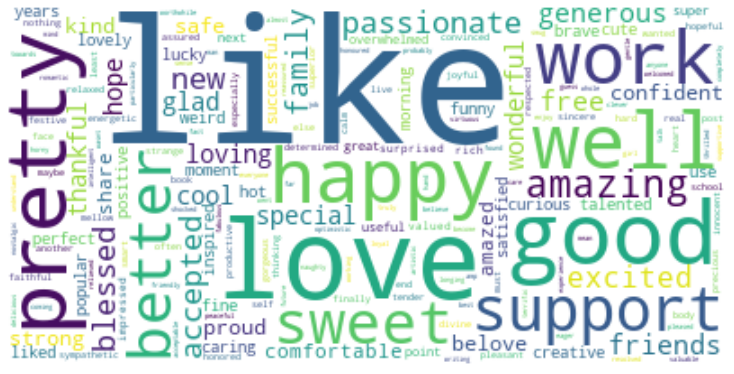

In [265]:
pos_Freq_Name = nltk.FreqDist(unigram_pos)

unigram_wordcloud_pos = WordCloud(background_color = 'white').generate_from_frequencies(pos_Freq_Name)
plt.figure(figsize = (10,7))
plt.imshow(unigram_wordcloud_pos,interpolation = 'bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig("pos.png")
plt.show()


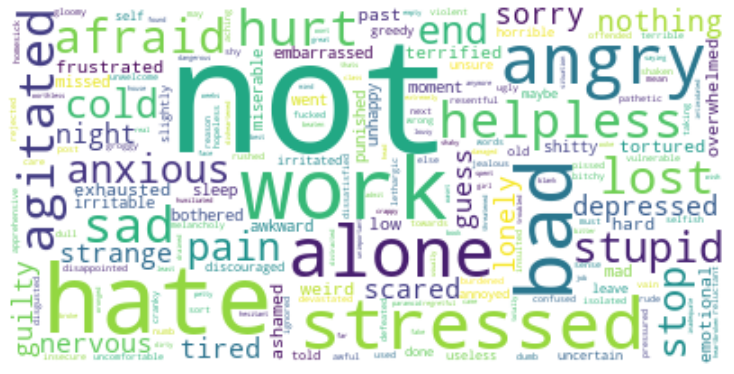

In [267]:
neg_Freq_Name = nltk.FreqDist(unigram_neg)

unigram_wordcloud_neg = WordCloud(background_color = 'white').generate_from_frequencies(neg_Freq_Name)
plt.figure(figsize = (10, 7))
plt.imshow(unigram_wordcloud_neg,interpolation = 'bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig("neg.png")
plt.show()


### Feature Engineering

In [210]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [211]:
from tqdm import tqdm

preprocessed_pos = []

for sent in tqdm(positivity['Cleaned Text'].values):
    sent = ' '.join(e for e in sent.split() if e not in stopwords_pos)
    preprocessed_pos.append(sent.strip())
    
positivity['Cleaned Text'] = preprocessed_pos

preprocessed_neg = []

for sent in tqdm(negativity['Cleaned Text'].values):
    sent = ' '.join(e for e in sent.split() if e not in stopwords_neg)
    preprocessed_neg.append(sent.strip())

negativity['Cleaned Text'] = preprocessed_neg

emotion = positivity.append(negativity)

100%|████████████████████████████████████████| 9121/9121 [00:00<00:00, 26887.36it/s]
/var/folders/gc/f7pnlsyj2yjgzx2rtkxmq9g80000gn/T/ipykernel_17038/2718622190.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positivity['Cleaned Text'] = preprocessed_pos
100%|██████████████████████████████████████| 10879/10879 [00:00<00:00, 25915.40it/s]
/var/folders/gc/f7pnlsyj2yjgzx2rtkxmq9g80000gn/T/ipykernel_17038/2718622190.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negativity['Cleaned Text'] = preprocess

In [212]:
features_x =  emotion['Cleaned Text']
labels_y = emotion['Emotion'] 

### Model Building

In [213]:
X_train, X_test, y_train, y_test = train_test_split(features_x, labels_y, 
                                                   test_size = 0.2, random_state = 123)

In [214]:
multi = MultinomialNB()
logr = LogisticRegression()

In [215]:
from sklearn.pipeline import Pipeline

logreg_model = Pipeline(steps = [('CountVec', CountVectorizer()), ('LogReg', logr)])
logreg_model.fit(X_train, y_train)

multi_model = Pipeline(steps = [('CountVec', CountVectorizer()), ('MultiNB', multi)])
multi_model.fit(X_train, y_train)

Pipeline(steps=[('CountVec', CountVectorizer()), ('MultiNB', MultinomialNB())])

In [216]:
# Logistic Regression Metrics

y_pred_lr = logreg_model.predict(X_test)
logreg_model.score(X_train, y_train)

0.992875

In [217]:
# Multinomial NB Metrics

y_pred_nb = multi_model.predict(X_test)
multi_model.score(X_train, y_train)

0.9856875

In [218]:
# Predictions

example_text = "I do not like pineapples"
prediction = logreg_model.predict([example_text])



prediction

array(['Negative'], dtype=object)

In [219]:
#dataframe listing the emotions and respective probabilities

model_class = logreg_model.classes_
class_df = pd.DataFrame(model_class)

model_pred = logreg_model.predict_proba([example_text])
pred_df = pd.DataFrame(model_pred).T

sent_prob = pd.concat([class_df, pred_df], axis = 1)
sent_prob.columns = ['Sentiment','Probability']
sent_prob

,Sentiment,Probability
0,Negative,0.517903
1,Positive,0.482097


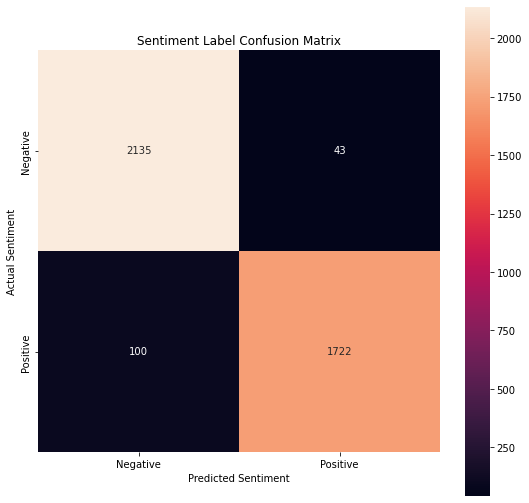

In [263]:
#Confusion Matrix 

from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(figsize=(9, 9))

mat = confusion_matrix(y_test, y_pred_logr)
ax = sns.heatmap(mat, square = True, annot=True, fmt='g', cbar=True)
ax.set_title('Sentiment Label Confusion Matrix');
ax.set_xlabel('Predicted Sentiment')
ax.set_ylabel('Actual Sentiment');

ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive'])

plt.savefig("conf.png")
plt.show()

In [221]:
#Pickle file

import joblib
sav_model = open("Emotion_Classifier_Model.pkl", "wb")
joblib.dump(logreg_model, sav_model)
sav_model.close()